In [ ]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from natsort import natsorted
import librosa
import noisereduce as nr
from IPython.display import Audio, display

### UA-Speech text for Grad-TTS

In [ ]:
prompt = pd.read_excel('', header=None)  ## add .xlsx with text from UA-Speech (765 words)
print(prompt.head())

### Synthetic speech (df_UAS_syn.csv)

#### Create dataframe

In [ ]:
def speaker_id(speaker):
    if speaker== 'F01':
        intell='low' # dysarthria severity level
        label=1 # class
        id=15  # speaker identification code
    elif speaker== 'M01':
        intell='low'
        label=1
        id=18
    elif speaker== 'M02':
        intell='low'
        label=1
        id=19
    elif speaker== 'M04':
        intell='low'
        label=1
        id=21
    elif speaker== 'M05':
        intell='mid'
        label=2
        id=22
    elif speaker== 'F03':
        intell='high'
        label=3
        id=16
    elif speaker== 'F04':
        intell='high'
        label=3
        id=17
    elif speaker== 'M03':
        intell='high'
        label=3
        id=20
    return intell, label, id

In [ ]:
df_UAS_syn=pd.DataFrame(columns=['filename', 'label', 'split' ,'durations', 'code', 'id'])
path_dir='' # folder with synthesized audio files
speaker=['F01','F03','F04','M01','M02','M03', 'M04','M05'] 

i=0
for s in speaker:
    spk=f"TORGO_{s}"
    intell, label, id= speaker_id(s)
    spk_dir=os.path.join(path_dir, spk)
    file= [f for f in natsorted(os.listdir(spk_dir)) if f.endswith('.wav') ]
    for f in file:
        i+=1
        filename=os.path.join(path_dir, f"TORGO_{s}", f)
        durata = librosa.get_duration(path=filename)
        code=f[:-4]
        df_UAS_syn.loc[i]=[filename, label, 'train', durata, code, id]  # all synthesized data in train

#df_UAS_syn.to_csv('df_UAS_syn.csv', index=False) # save dataframe 

#### Dataset analysis

In [ ]:
df_UAS_syn=pd.read_csv('df_UAS_syn.csv')

mean_duration = np.mean(df_UAS_syn['durations'].values)
print(f"Media delle durate: {mean_duration:.2f} secondi")
max_duration = np.max(df_UAS_syn['durations'].values)
print(f"Durata massima: {max_duration:.2f} secondi")
min_duration = np.min(df_UAS_syn['durations'].values)
print(f"Durata minima: {min_duration:.2f} secondi")
print(f"Numero di file: {len(df_UAS_syn)}")

### PLOT ###

plt.figure(figsize=(10, 5))
df_UAS_syn['durations'].hist(bins=50, alpha=0.5, color='blue')

labels = ['Low','Mid', 'High']
occorrenze=df_UAS_syn['label'].value_counts()
occorrenze = list(df_UAS_syn['label'].value_counts())
plt.figure(figsize=(8, 5))
plt.bar(labels, occorrenze, color='skyblue')
plt.figure(figsize=(10, 5))


Text(0.5, 1.0, 'TORGO_M05')

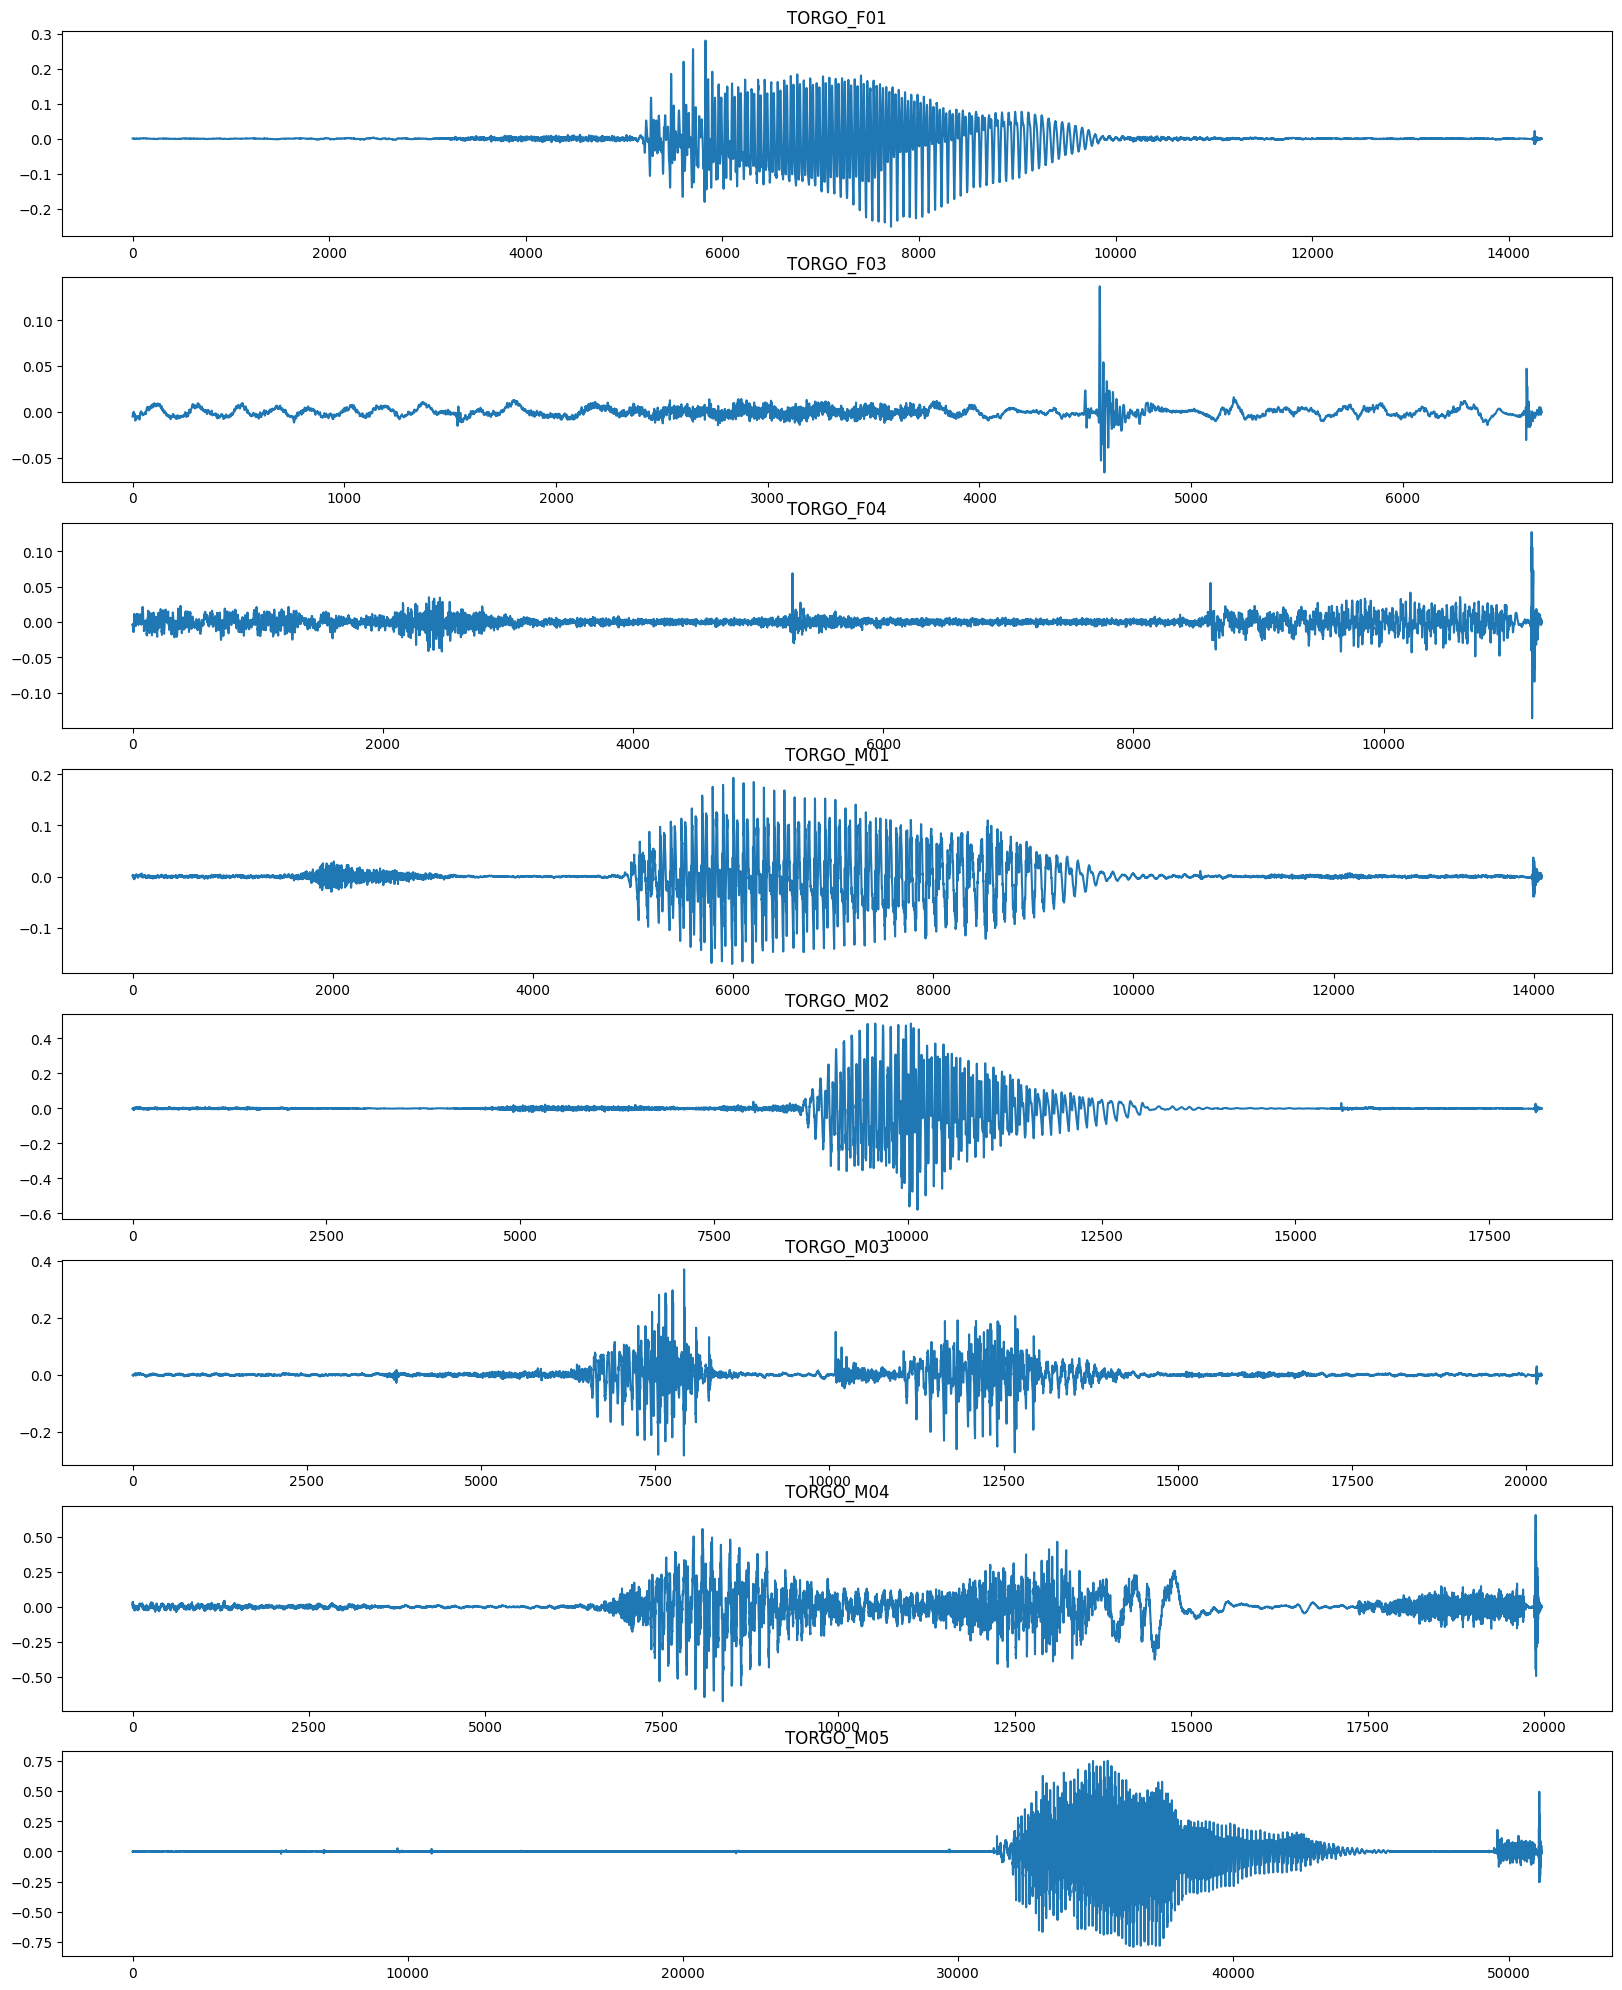

In [ ]:
### PLOT FOR PATIENT ###

path_F01=df_UAS_syn['filename'].iloc[15]
path_F03=df_UAS_syn['filename'].iloc[1058]
path_F04=df_UAS_syn['filename'].iloc[2068]
path_M01=df_UAS_syn['filename'].iloc[2571]
path_M02=df_UAS_syn['filename'].iloc[3207]
path_M03=df_UAS_syn['filename'].iloc[3975]
path_M04=df_UAS_syn['filename'].iloc[4879]
path_M05=df_UAS_syn['filename'].iloc[5558]
sampling_rate=16000
audio_F01, sr = librosa.load(path_F01, sr=sampling_rate)
audio_F03, sr = librosa.load(path_F03, sr=sampling_rate)
audio_F04, sr = librosa.load(path_F04, sr=sampling_rate)
audio_M01, sr = librosa.load(path_M01, sr=sampling_rate)
audio_M02, sr = librosa.load(path_M02, sr=sampling_rate)
audio_M03, sr = librosa.load(path_M03, sr=sampling_rate)
audio_M04, sr = librosa.load(path_M04, sr=sampling_rate)
audio_M05, sr = librosa.load(path_M05, sr=sampling_rate)

from IPython.display import Audio, display

sound1 = Audio(audio_F01, rate=sampling_rate)
sound2 = Audio(audio_F03, rate=sampling_rate)
sound3 = Audio(audio_F04, rate=sampling_rate)
sound4 = Audio(audio_M01, rate=sampling_rate)
sound5 = Audio(audio_M02, rate=sampling_rate)
sound6 = Audio(audio_M03, rate=sampling_rate)
sound7 = Audio(audio_M04, rate=sampling_rate)
sound8 = Audio(audio_M05, rate=sampling_rate)

display(sound1)
display(sound2)
display(sound3)
display(sound4)
display(sound5)
display(sound6)
display(sound7)
display(sound8)

plt.figure(figsize=(20, 25))
plt.subplot(8,1,1)
plt.plot(audio_F01)
plt.title("TORGO_F01")
plt.subplot(8,1,2)
plt.plot(audio_F03)
plt.title("TORGO_F03")
plt.subplot(8,1,3)
plt.plot(audio_F04)
plt.title("TORGO_F04")
plt.subplot(8,1,4)
plt.plot(audio_M01)
plt.title("TORGO_M01")
plt.subplot(8,1,5)
plt.plot(audio_M02)
plt.title("TORGO_M02")
plt.subplot(8,1,6)
plt.plot(audio_M03)
plt.title("TORGO_M03")
plt.subplot(8,1,7)
plt.plot(audio_M04)
plt.title("TORGO_M04")
plt.subplot(8,1,8)
plt.plot(audio_M05)
plt.title("TORGO_M05")




### UA-Speech (df_UA-Speech.csv)

#### Create dataframe

In [3]:
def get_labels(patient_folder):
    if patient_folder == 'F02':
        label = 1
        id = 0
    elif patient_folder == 'F03': 
        label = 0
        id = 1
    elif patient_folder == 'F04':
        label = 2
        id = 2
    elif patient_folder == 'F05':
        label = 3
        id = 3
    elif patient_folder == 'M01':
        label = 0
        id = 4
    elif patient_folder == 'M04':
        label = 0
        id = 5
    elif patient_folder == 'M05':
        label = 2
        id = 6
    elif patient_folder == 'M07':
        label = 1
        id = 7
    elif patient_folder == 'M08':
        label = 3
        id = 8
    elif patient_folder == 'M09':
        label = 3
        id = 9
    elif patient_folder == 'M10':
        label = 3
        id = 10
    elif patient_folder == 'M11':
        label = 2
        id = 11
    elif patient_folder == 'M12':
        label = 0
        id = 12
    elif patient_folder == 'M14':
        label = 3
        id = 13
    elif patient_folder == 'M16':
        label = 1
        id = 14
    return label, id

In [ ]:
patients_path='UA-Speech/audio/patient'
df = pd.DataFrame(columns=['filename', 'label', 'split', 'durations','code', 'id'])
i = 0
for root, dirs, files in os.walk(patients_path):
    for dir in dirs:
       for file in natsorted(os.listdir(os.path.join(root, dir))):
            i += 1
            label, id = get_labels(dir)
            durata = librosa.get_duration(path=os.path.join(root,dir, file))
            df.loc[i] = [os.path.join(patients_path,dir,file), label, '', durata, file[:-4], int(id)]

df.head()

#df.to_csv('df_UA-Speech.csv', index=False) # save dataframe

,filename,label,split,durations,code,id
1,/home/tbasili/TTDS/UA-Speech/audio/patient/M10...,3,,2.030312,B1_C1,10
2,/home/tbasili/TTDS/UA-Speech/audio/patient/M10...,3,,2.155125,B1_C2,10
3,/home/tbasili/TTDS/UA-Speech/audio/patient/M10...,3,,1.904062,B1_C3,10
4,/home/tbasili/TTDS/UA-Speech/audio/patient/M10...,3,,1.912313,B1_C4,10
5,/home/tbasili/TTDS/UA-Speech/audio/patient/M10...,3,,1.925750,B1_C5,10


#### Dataset analysis

In [ ]:
df=pd.read_csv('df_UA-Speech.csv')
mean_duration = np.mean(df['durations'].values)
print(f"Media delle durate: {mean_duration:.2f} secondi")
max_duration = np.max(df['durations'].values)
print(f"Durata massima: {max_duration:.2f} secondi")
min_duration = np.min(df['durations'].values)
print(f"Durata minima: {min_duration:.2f} secondi")

plt.figure(figsize=(10, 5))
df['durations'].hist(bins=50, alpha=0.5, color='blue')

print(f"Numero di file totali nel dataset: {len(df)}")

print('Numero di istanze per classe')
print(f"Very low: {len(df[df['label']==0])}")
print(f"Low: {len(df[df['label']== 1])}")
print(f"Mid: {len(df[df['label']==2])}")
print(f"High: {len(df[df['label']==3])}")

print("Numero file per speaker")
print(f"F02: {len(df[df['id']==0])}")
print(f"F03: {len(df[df['id']==1])}")
print(f"F04: {len(df[df['id']==2])}")
print(f"F05: {len(df[df['id']==3])}")
print(f"M01: {len(df[df['id']==4])}")
print(f"M04: {len(df[df['id']==5])}")
print(f"M05: {len(df[df['id']==6])}")
print(f"M07: {len(df[df['id']==7])}")
print(f"M08: {len(df[df['id']==8])}")
print(f"M09: {len(df[df['id']==9])}")
print(f"M10: {len(df[df['id']==10])}")
print(f"M11: {len(df[df['id']==11])}")
print(f"M12: {len(df[df['id']==12])}")
print(f"M14: {len(df[df['id']==13])}")
print(f"M16: {len(df[df['id']==14])}")

labels = ['Very low', 'Low','Mid', 'High']
frequenze = list(df['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi nell'UA-speech")
plt.tight_layout()
plt.show()


### Split for multiclass

#### Split UA-Speech in train val test

In [ ]:
#dataframe=pd.read_csv('df_UA-Speech.csv')

## Split train validation test 

for i in range(len(dataframe)):
    id=dataframe.iloc[i]['id']
    if id==1 or id==5 or id==0 or id==2 or id==3 or id==9 or id==10 :
       dataframe.loc[i,'split']='train'
    elif id==4 or id==7 or id==6 or id==8 :
       dataframe.loc[i,'split']='val' 
    else:
        dataframe.loc[i,'split']='test'
#dataframe.to_csv('UAS_train_val_test.csv', index=False)


### ANALISI SPLIT ###
df_train=dataframe[dataframe['split']=='train']
df_val=dataframe[dataframe['split']=='val']
df_test=dataframe[dataframe['split']=='test']
print(f"Numero esempi in train: {len(df_train)}")
print(f"Numero esempi in validation: {len(df_val)}" )
print(f"Numero esempi in test: {len(df_test)}")
## TRAIN
labels = ['Very low', 'Low','Mid', 'High']
frequenze = list(df_train['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in train")
plt.tight_layout()
plt.show()
## VAL
labels = ['Very low', 'Low','Mid', 'High']
frequenze = list(df_val['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in validation")
plt.tight_layout()
plt.show()
## TEST
labels = ['Very low', 'Low','Mid', 'High']
frequenze = list(df_test['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in test")
plt.tight_layout()
plt.show()


#### Add synthetic data to train

In [ ]:
df=pd.read_csv('UAS_train_val_test.csv') # original data split in train val test
df_syn=pd.read_csv('df_UAS_syn.csv') # data synthesized
# all synthetic speech in train 
df_syn['split']='train'
UAS_syn_split=pd.concat([df, df_syn], ignore_index=True )
UAS_syn_split.to_csv('/home/tbasili/TTDS/UA-Speech/UAS+syn_split.csv', index=False) 

In [ ]:
## Class balancing
df=pd.read_csv('UAS_train_val_test_filtered.csv')
df_syn=pd.read_csv('df_UAS_syn.csv')
df_train=df[df['split']=='train']
df_0=df_train[df_train['label']==0]
df_1=df_train[df_train['label']==1]
df_2=df_train[df_train['label']==2]
df_3=df_train[df_train['label']==3]
df_syn_1=df_syn[df_syn['label']==1]
df_syn_2=df_syn[df_syn['label']==2]
n_sample_add_1=len(df_0)-len(df_1)
n_sample_add_2=len(df_0)-len(df_2)
n_sample_remove_3=len(df_3)-len(df_0)
random_sample_1 = df_syn_1.sample(n=n_sample_add_1, random_state=42) 
random_sample_2 = df_syn_2.sample(n=n_sample_add_2, random_state=42) 
random_sample_3 = df_3.sample(n=n_sample_remove_3, random_state=42).index
df_new = df.drop(random_sample_3, axis=0)
df_new=pd.concat([df_new, random_sample_1, random_sample_2], ignore_index=True )
df_new_train=df_new[df_new['split']=='train']
df_new_val=df_new[df_new['split']=='val']
df_new_test=df_new[df_new['split']=='test']
print(f"Numero esempi in train: {len(df_new_train)}")
print(f"Numero esempi in validation: {len(df_new_val)}" )
print(f"Numero esempi in test: {len(df_new_test)}")
## TRAIN
labels = ['Very low', 'Low','Mid', 'High']
frequenze = list(df_new_train['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in train")
plt.tight_layout()
plt.show()



In [ ]:
df_new.to_csv('UAS+syn_belanced.csv', index=False)

#### Dataset analysis

In [ ]:
df=pd.read_csv( '')

In [ ]:

print(f"Numero di file: {len(df)}")
mean_duration = np.mean(df['durations'].values)
print(f"Media delle durate: {mean_duration:.2f} secondi")
max_duration = np.max(df['durations'].values)
print(f"Durata massima: {max_duration:.2f} secondi")
min_duration = np.min(df['durations'].values)
print(f"Durata minima: {min_duration:.2f} secondi")
plt.figure(figsize=(10, 5))
df['durations'].hist(bins=50, alpha=0.5, color='blue')

## Split
df_train=df[df['split']=='train']
df_val=df[df['split']=='val']
df_test=df[df['split']=='test']
print(f"Numero esempi in train: {len(df_train)}")
print(f"Numero esempi in validation: {len(df_val)}" )
print(f"Numero esempi in test: {len(df_test)}")

## TRAIN
labels = ['Very low', 'Low','Mid', 'High']
frequenze = list(df_train['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in train")
plt.tight_layout()
plt.show()

## VAL
labels = ['Very low', 'Low','Mid', 'High']
frequenze = list(df_val['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in validation")
plt.tight_layout()
plt.show()

## TEST
labels = ['Very low', 'Low','Mid', 'High']
frequenze = list(df_test['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in test")
plt.tight_layout()
plt.show()


#### Dataset filtered

In [ ]:
df=pd.read_csv('')
## Elimino gli audio con durata maggiore di 6 sec
df_filtered = df[df['durations'] <= 6].reset_index(drop=True)
#df_filtered = df_filtered[df_filtered['durations'] >= 0.2].reset_index(drop=True)

mean_duration = np.mean(df_filtered['durations'].values)
print(f"Media delle durate: {mean_duration:.2f} secondi")
max_duration = np.max(df_filtered['durations'].values)
print(f"Durata massima: {max_duration:.2f} secondi")
min_duration = np.min(df_filtered['durations'].values)
print(f"Durata minima: {min_duration:.2f} secondi")
plt.figure(figsize=(10, 5))
df_filtered['durations'].hist(bins=50, alpha=0.5, color='blue')

print(f"Numero di file rimanenti: {len(df_filtered)}")
print(f"Numero di file eliminati: {len(df) - len(df_filtered)}")

df_filtered_train=df_filtered[df_filtered['split']=='train']
df_filtered_val=df_filtered[df_filtered['split']=='val']
df_filtered_test=df_filtered[df_filtered['split']=='test']

print(f'Numero di istanze in train: {len(df_filtered_train)}' )
print(f'Numero di istanze in validation: {len(df_filtered_val)}' )
print(f'Numero di istanze in test: {len(df_filtered_test)}' )

print('Numero di istanze per classe in train')
print(f"Very low: {len(df_filtered_train[df_filtered_train['label']==0])}")
print(f"Low: {len(df_filtered_train[df_filtered_train['label']== 1])}")
print(f"Mid: {len(df_filtered_train[df_filtered_train['label']==2])}")
print(f"High: {len(df_filtered_train[df_filtered_train['label']==3])}")

print('Numero di istanze per classe in validation')
print(f"Very low: {len(df_filtered_val[df_filtered_val['label']==0])}")
print(f"Low: {len(df_filtered_val[df_filtered_val['label']== 1])}")
print(f"Mid: {len(df_filtered_val[df_filtered_val['label']==2])}")
print(f"High: {len(df_filtered_val[df_filtered_val['label']==3])}")

print("Numero file per speaker")
print(f"F02: {len(df_filtered[df_filtered['id']==0])}")
print(f"F03: {len(df_filtered[df_filtered['id']==1])}")
print(f"F04: {len(df_filtered[df_filtered['id']==2])}")
print(f"F05: {len(df_filtered[df_filtered['id']==3])}")
print(f"M01: {len(df_filtered[df_filtered['id']==4])}")
print(f"M04: {len(df_filtered[df_filtered['id']==5])}")
print(f"M05: {len(df_filtered[df_filtered['id']==6])}")
print(f"M07: {len(df_filtered[df_filtered['id']==7])}")
print(f"M08: {len(df_filtered[df_filtered['id']==8])}")
print(f"M09: {len(df_filtered[df_filtered['id']==9])}")
print(f"M10: {len(df_filtered[df_filtered['id']==10])}")
print(f"M11: {len(df_filtered[df_filtered['id']==11])}")
print(f"M12: {len(df_filtered[df_filtered['id']==12])}")
print(f"M14: {len(df_filtered[df_filtered['id']==13])}")
print(f"M16: {len(df_filtered[df_filtered['id']==14])}")

print(f"TORGO_F01: {len(df_filtered[df_filtered['id']==15])}")
print(f"TORGO_F03: {len(df_filtered[df_filtered['id']==16])}")
print(f"TORGO_F04: {len(df_filtered[df_filtered['id']==17])}")
print(f"TORGO_M01: {len(df_filtered[df_filtered['id']==18])}")
print(f"TORGO_M02: {len(df_filtered[df_filtered['id']==19])}")
print(f"TORGO_M03: {len(df_filtered[df_filtered['id']==20])}")
print(f"TORGO_M04: {len(df_filtered[df_filtered['id']==21])}")
print(f"TORGO_M05: {len(df_filtered[df_filtered['id']==22])}")

labels = ['Very low', 'Low','Mid', 'High']
frequenze = list(df_filtered_train['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in train")
plt.tight_layout()
plt.show()

labels = ['Very low', 'Low','Mid', 'High']
frequenze = list(df_filtered_val['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in validation")
plt.tight_layout()
plt.show()

labels = ['Very low', 'Low','Mid', 'High']
frequenze = list(df_filtered_test['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in test")
plt.tight_layout()
plt.show()



In [ ]:
df_filtered.to_csv('', index=False)

### Split for binary

In [ ]:
## same patient distribution in train validation and test used in multiclass classification
## Change labels from 4 classes to 2

#df=pd.read_csv('/home/tbasili/TTDS/UA-Speech/UAS_train_val_test_filtered.csv')
#df=pd.read_csv('/home/tbasili/TTDS/UA-Speech/df_UAS_syn.csv')

df_binary=pd.DataFrame(columns=['filename', 'label', 'split' ,'durations', 'code', 'id'])
for i, row in df.iterrows():
    filename=df.loc[i]['filename']
    split=df.loc[i]['split']
    durations=df.loc[i]['durations']
    code=df.loc[i]['code']
    id=df.loc[i]['id']
    label=df.loc[i]['label']
    if label==0 or label==1:
        label_binary=0          # 'Low' severity level
    elif label==2 or label==3:
        label_binary=1          # 'High' severity level
    #print(label_binary)
    df_binary.loc[i]=[filename, label_binary, split ,durations, code, id]
    

#df_binary.to_csv('UAS_binary.csv', index=False)
#df_binary.to_csv('df_UAS_syn_binary.csv', index=False)

## Add synthetic speech in train 
df_UAS=pd.read_csv('UAS_binary.csv')
df_syn=pd.read_csv('UAS_syn_binary.csv')
df_UAS+syn=pd.concat([df_UAS, df_syn], ignore_index=True )
df_UAS+syn.to_csv('UAS+syn_binary.csv', index=False)


In [ ]:
## New split binary classification: 2 patient in validation, 2 patient in test.

df=pd.read_csv('UAS_binary.csv')
df_binary=pd.DataFrame(columns=['filename', 'label', 'split' ,'durations', 'code', 'id'])
for i, row in df.iterrows():
    filename=df.loc[i]['filename']
    split=df.loc[i]['split']
    durations=df.loc[i]['durations']
    code=df.loc[i]['code']
    id=df.loc[i]['id']
    label=df.loc[i]['label']
    if id==4 or id==8 :
        new_split= 'val'
    elif id==12 or id==13:
        new_split='test'
    else:
        new_split='train'
    df_binary.loc[i]=[filename, label, new_split ,durations, code, id]
    

df_binary.to_csv('UAS_binary_v2.csv', index=False)

## Add synthetic speech in train 

df_UAS_v2=pd.read_csv('UAS_binary_v2.csv')
df_syn=pd.read_csv('UAS_syn_binary.csv')
df_UAS_syn=pd.concat([df_UAS_v2, df_syn], ignore_index=True )
df_UAS_syn.to_csv('UAS+syn_binary_v2.csv', index=False)

In [ ]:
## Dataset analysis

df=pd.read_csv('')

mean_duration = np.mean(df['durations'].values)
print(f"Media delle durate: {mean_duration:.2f} secondi")
max_duration = np.max(df['durations'].values)
print(f"Durata massima: {max_duration:.2f} secondi")
min_duration = np.min(df['durations'].values)
print(f"Durata minima: {min_duration:.2f} secondi")
plt.figure(figsize=(10, 5))
df['durations'].hist(bins=50, alpha=0.5, color='blue')

print(f"Numero di file: {len(df)}")

df_train=df[df['split']=='train']
df_val=df[df['split']=='val']
df_test=df[df['split']=='test']

print(f'Numero di istanze in train: {len(df_train)}' )
print(f'Numero di istanze in validation: {len(df_val)}' )
print(f'Numero di istanze in test: {len(df_test)}' )

print('Numero di istanze per classe in train')
print(f"Low: {len(df_train[df_train['label']== 0])}")
print(f"High: {len(df_train[df_train['label']==1])}")

print('Numero di istanze per classe in validation')
print(f"Low: {len(df_val[df_val['label']== 0])}")
print(f"High: {len(df_val[df_val['label']==1])}")

print("Numero file per speaker")
print(f"F02: {len(df[df['id']==0])}")
print(f"F03: {len(df[df['id']==1])}")
print(f"F04: {len(df[df['id']==2])}")
print(f"F05: {len(df[df['id']==3])}")
print(f"M01: {len(df[df['id']==4])}")
print(f"M04: {len(df[df['id']==5])}")
print(f"M05: {len(df[df['id']==6])}")
print(f"M07: {len(df[df['id']==7])}")
print(f"M08: {len(df[df['id']==8])}")
print(f"M09: {len(df[df['id']==9])}")
print(f"M10: {len(df[df['id']==10])}")
print(f"M11: {len(df[df['id']==11])}")
print(f"M12: {len(df[df['id']==12])}")
print(f"M14: {len(df[df['id']==13])}")
print(f"M16: {len(df[df['id']==14])}")

print(f"TORGO_F01: {len(df[df['id']==15])}")
print(f"TORGO_F03: {len(df[df['id']==16])}")
print(f"TORGO_F04: {len(df[df['id']==17])}")
print(f"TORGO_M01: {len(df[df['id']==18])}")
print(f"TORGO_M02: {len(df[df['id']==19])}")
print(f"TORGO_M03: {len(df[df['id']==20])}")
print(f"TORGO_M04: {len(df[df['id']==21])}")
print(f"TORGO_M05: {len(df[df['id']==22])}")

labels = ['Low','High']
frequenze = list(df_train['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in train")
plt.tight_layout()
plt.show()

frequenze = list(df_val['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in validation")
plt.tight_layout()
plt.show()

frequenze = list(df_test['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in test")
plt.tight_layout()
plt.show()



### Add data from TORGO (binary)

In [ ]:
df_UAS=pd.read_csv('UAS_binary.csv') # UA-Speech (label for binary classification)
df_TORGO=pd.read_csv('df_word_and_segment.csv') # TORGO dataframe 

In [ ]:
# create dataframe for TORGO to make it compatible with UA-speech dataframe
#df_TORGO=pd.read_csv('/home/tbasili/TTDS/ResNet/dataset_analysis/df_syn_word_and_segment.csv') # synthetic data with text from TORGO
df_TORGO=pd.read_csv('/home/tbasili/TTDS/Classificazione_TORGO/dataset_analysis/df_word_and_segment.csv') # original data from TORGO
df_TORGOnew=pd.DataFrame(columns=['filename', 'label', 'split' ,'durations', 'code', 'id'])

def speaker_id(speaker):
    if speaker== 'F01':
        label=0
        id=15
    elif speaker== 'M01':
        label=0
        id=18
    elif speaker== 'M02':
        label=0
        id=19
    elif speaker== 'M04':
        label=0
        id=21
    elif speaker== 'M05':
        label=1
        id=22
    elif speaker== 'F03':
        label=1
        id=16
    elif speaker== 'F04':
        label=1
        id=17
    elif speaker== 'M03':
        label=1
        id=20
    return label, id

for i, row in df_TORGO.iterrows():
    spk=df_TORGO.loc[i]['speaker']
    label, id =speaker_id(spk)
    filename=df_TORGO.loc[i]['filename']
    durations=df_TORGO.loc[i]['durata']
    code=''
    df_TORGOnew.loc[i]=[filename, label, 'train' ,durations, code, id] # all data in train

#df_TORGOnew.to_csv(TORGO_syn_binary.csv', index=False)
df_TORGOnew.to_csv('TORGO_binary.csv', index=False)

In [ ]:
## Create dataframe with data from UA-Speech and TORGO for binary classification 

df_UAS=pd.read_csv('UAS_binary.csv')
df_TORGOnew=pd.read_csv('TORGO_binary.csv')
UAS_TORGO=pd.concat([df_TORGOnew, df_UAS], ignore_index=True )
UAS_TORGO.to_csv('UAS+TORGO_binary.csv', index=False)

In [ ]:
## Create dataframe with data from UA-Speech and TORGO and all synthetic data for binary classification 
df_UAS=pd.read_csv('UAS_binary.csv')
df_TORGOnew=pd.read_csv('TORGO_binary.csv')
df_UAS_syn=pd.read_csv('UAS_syn_binary.csv')
df_TORGO_syn=pd.read_csv('TORGO_syn_binary.csv')
UAS_TORGO_syn=pd.concat([df_TORGOnew, df_UAS, df_UAS_syn, df_TORGO_syn], ignore_index=True )
UAS_TORGO_syn.to_csv('UAS+TORGO+allsyn_binary.csv', index=False)

In [ ]:
## Dataset analysis
df=pd.read_csv('')

mean_duration = np.mean(df['durations'].values)
print(f"Media delle durate: {mean_duration:.2f} secondi")
max_duration = np.max(df['durations'].values)
print(f"Durata massima: {max_duration:.2f} secondi")
min_duration = np.min(df['durations'].values)
print(f"Durata minima: {min_duration:.2f} secondi")
plt.figure(figsize=(10, 5))
df['durations'].hist(bins=50, alpha=0.5, color='blue')

print(f"Numero di file: {len(df)}")

df_train=df[df['split']=='train']
df_val=df[df['split']=='val']
df_test=df[df['split']=='test']

print(f'Numero di istanze in train: {len(df_train)}' )
print(f'Numero di istanze in validation: {len(df_val)}' )
print(f'Numero di istanze in test: {len(df_test)}' )

print('Numero di istanze per classe in train')
print(f"Low: {len(df_train[df_train['label']== 0])}")
print(f"High: {len(df_train[df_train['label']==1])}")

print('Numero di istanze per classe in validation')
print(f"Low: {len(df_val[df_val['label']== 0])}")
print(f"High: {len(df_val[df_val['label']==1])}")

print("Numero file per speaker")
print(f"F02: {len(df[df['id']==0])}")
print(f"F03: {len(df[df['id']==1])}")
print(f"F04: {len(df[df['id']==2])}")
print(f"F05: {len(df[df['id']==3])}")
print(f"M01: {len(df[df['id']==4])}")
print(f"M04: {len(df[df['id']==5])}")
print(f"M05: {len(df[df['id']==6])}")
print(f"M07: {len(df[df['id']==7])}")
print(f"M08: {len(df[df['id']==8])}")
print(f"M09: {len(df[df['id']==9])}")
print(f"M10: {len(df[df['id']==10])}")
print(f"M11: {len(df[df['id']==11])}")
print(f"M12: {len(df[df['id']==12])}")
print(f"M14: {len(df[df['id']==13])}")
print(f"M16: {len(df[df['id']==14])}")

print(f"TORGO_F01: {len(df[df['id']==15])}")
print(f"TORGO_F03: {len(df[df['id']==16])}")
print(f"TORGO_F04: {len(df[df['id']==17])}")
print(f"TORGO_M01: {len(df[df['id']==18])}")
print(f"TORGO_M02: {len(df[df['id']==19])}")
print(f"TORGO_M03: {len(df[df['id']==20])}")
print(f"TORGO_M04: {len(df[df['id']==21])}")
print(f"TORGO_M05: {len(df[df['id']==22])}")

labels = ['Low','High']
frequenze = list(df_train['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in train")
plt.tight_layout()
plt.show()

frequenze = list(df_val['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in validation")
plt.tight_layout()
plt.show()

frequenze = list(df_test['label'].value_counts().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(labels, frequenze, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Numero di esempi')
plt.title("Distribuzione delle classi in test")
plt.tight_layout()
plt.show()



### Add data from TORGO (multiclass) 


In [ ]:
## same patient distribution in train validation and test used in binary classification
## Change labels from 2 classes to 4

#df=pd.read_csv('/home/tbasili/TTDS/UA-Speech/UAS+TORGO_binary.csv')
df=pd.read_csv('/home/tbasili/TTDS/UA-Speech/UAS+TORGO+allsyn_binary.csv')

df_multiclass=pd.DataFrame(columns=['filename', 'label', 'split' ,'durations', 'code', 'id'])

def convert_multiclass(id_spk):
    if id_spk==1 or id_spk==4 or id_spk==5 or id_spk==12:
        label=0
    elif id_spk==0 or id_spk==7 or id_spk==14 or id_spk==15 or id_spk==18 or id_spk==19 or id_spk==21:
        label=1
    elif id_spk==2 or id_spk==6 or id_spk==11 or id_spk==22:
        label=2
    elif id_spk==3 or id_spk==8 or id_spk==9 or id_spk==10 or id_spk==13 or id_spk==16 or id_spk==17 or id_spk==20:
        label=3
    return label

for i, row in df.iterrows():
    id_spk=df.loc[i]['id']
    label=convert_multiclass(id_spk)
    filename=df.loc[i]['filename']
    durations=df.loc[i]['durations']
    code=df.loc[i]['code']
    split=df.loc[i]['split']
    df_multiclass.loc[i]=[filename, label, split ,durations, code, id_spk]

#df_multiclass.to_csv('/home/tbasili/TTDS/UA-Speech/UAS+TORGO_multiclass.csv', index=False)
df_multiclass.to_csv('/home/tbasili/TTDS/UA-Speech/UAS+TORGO+allsyn_multiclass.csv', index=False)
